In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df=df.drop('country',axis=1)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

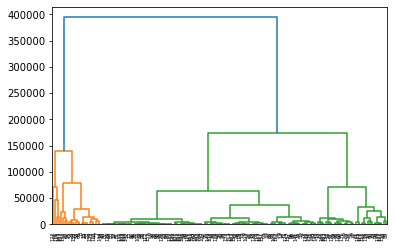

In [37]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))

In [39]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2)
clusters=model.fit_predict(x)
df['clusters']=clusters
df.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [54]:
x=df.drop('clusters',axis=1)
y=df['clusters']
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [56]:
y_train.value_counts()

0    113
1     20
Name: clusters, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
smoter=SMOTE()
x_train,y_train=smoter.fit_resample(x_train,y_train)

In [58]:
y_train.value_counts()

0    113
1    113
Name: clusters, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

In [61]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier(),
    'SVC':SVC(),
    'XG':XGBClassifier(),
    'G':GaussianNB()
    
    
}

In [62]:
for name,model in models.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(f'train accurancy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accurancy:{accuracy_score(y_test,y_predict)}')
    print(f'test con:{confusion_matrix(y_test,y_predict)}')
    print(f'recall:{recall_score(y_test,y_predict)}')
    print(f' pre:{precision_score(y_test,y_predict)}')
    print(f'f1:{f1_score(y_test,y_predict)}')
    print(f' fbeta :{fbeta_score(y_test,y_predict,beta=.5)}')
    print(f' report :{classification_report(y_test,y_predict)}')

    print('-'*33,'\n')

using:LR
train accurancy:0.995575221238938
test accurancy:0.9705882352941176
test con:[[29  1]
 [ 0  4]]
recall:1.0
 pre:0.8
f1:0.888888888888889
 fbeta :0.8333333333333334
 report :              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.80      1.00      0.89         4

    accuracy                           0.97        34
   macro avg       0.90      0.98      0.94        34
weighted avg       0.98      0.97      0.97        34

--------------------------------- 

using:KNN
train accurancy:0.9823008849557522
test accurancy:0.9411764705882353
test con:[[28  2]
 [ 0  4]]
recall:1.0
 pre:0.6666666666666666
f1:0.8
 fbeta :0.7142857142857142
 report :              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.67      1.00      0.80         4

    accuracy                           0.94        34
   macro avg       0.83      0.97      0.88        3

C:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


test accurancy:1.0
test con:[[30  0]
 [ 0  4]]
recall:1.0
 pre:1.0
f1:1.0
 fbeta :1.0
 report :              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         4

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

--------------------------------- 

using:G
train accurancy:0.9690265486725663
test accurancy:0.9411764705882353
test con:[[28  2]
 [ 0  4]]
recall:1.0
 pre:0.6666666666666666
f1:0.8
 fbeta :0.7142857142857142
 report :              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.67      1.00      0.80         4

    accuracy                           0.94        34
   macro avg       0.83      0.97      0.88        34
weighted avg       0.96      0.94      0.95        34

--------------------------------

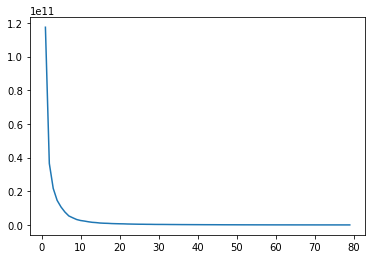

In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,80):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
plt.plot(range(1,80),wcss)
    

In [65]:
model=KMeans(n_clusters=5)
clusters=model.fit_predict(x)
df['clusters']=clusters
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [66]:
x=df.drop('clusters',axis=1)
y=df['clusters']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

In [72]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier(),
    'SVC':SVC(),
    'XG':XGBClassifier(),
    'G':GaussianNB()
    
    
}

In [73]:
for name,model in models.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(f'train accurancy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accurancy:{accuracy_score(y_test,y_predict)}')
    print(f' report :{classification_report(y_test,y_predict)}')

    print('-'*33,'\n')

using:LR
train accurancy:0.9398496240601504
test accurancy:0.7941176470588235
 report :              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.67      1.00      0.80         4
           2       0.80      0.73      0.76        11
           4       0.00      0.00      0.00         3

    accuracy                           0.79        34
   macro avg       0.57      0.67      0.61        34
weighted avg       0.73      0.79      0.76        34

--------------------------------- 

using:KNN
train accurancy:0.8721804511278195
test accurancy:0.7941176470588235
 report :              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.80      1.00      0.89         4
           2       0.78      0.64      0.70        11
           4       1.00      0.67      0.80         3

    accuracy                           0.79        34
   macro avg       0.84     

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train accurancy:1.0
test accurancy:0.9411764705882353
 report :              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00        11
           4       1.00      0.33      0.50         3

    accuracy                           0.94        34
   macro avg       0.92      0.83      0.82        34
weighted avg       0.96      0.94      0.93        34

--------------------------------- 

using:SVC
train accurancy:0.9398496240601504
test accurancy:0.8529411764705882
 report :              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.80      1.00      0.89         4
           2       0.89      0.73      0.80        11
           4       1.00      0.67      0.80         3

    accuracy                           0.85        34
   macro avg       0.88      0.83      0.84        3

C:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accurancy:1.0
test accurancy:0.9411764705882353
 report :              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00        11
           4       1.00      0.33      0.50         3

    accuracy                           0.94        34
   macro avg       0.92      0.83      0.82        34
weighted avg       0.96      0.94      0.93        34

--------------------------------- 

using:G
train accurancy:0.9097744360902256
test accurancy:0.7941176470588235
 report :              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.67      1.00      0.80         4
           2       0.69      1.00      0.81        11
           4       1.00      0.33      0.50         3

    accuracy                           0.79        34
   macro avg       0.84      0.76      0.73        34
